<a href="https://colab.research.google.com/github/ZJCHEN0109/AIMarchinLearn/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml0606/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f6f10f03a50>)

In [2]:
import pandas as pd
train_df = pd.read_csv("train.csv", encoding="utf-8")
predict_df = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
predict_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# df1=pd.DataFrame([
#     [1,2],
#     [3,4]
# ])
# df2=pd.DataFrame([
#     [5,6],
#     [7,8]
# ])
# pd.concat([df1,df2],axis=0,ignore_index=True)

,0,1
0,1,2
1,3,4
2,5,6
3,7,8


In [4]:
datas=pd.concat([train_df,predict_df],axis=0,ignore_index=True)
datas=datas.drop(["PassengerId","Survived"],axis=1)
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# df = pd.DataFrame([
#     [1, 2],
#     [3, 4]
# ])
# df.sum(axis=1)

In [ ]:
# # pandas篩選: 篩選[針對每一筆給出True/False]
# df = pd.DataFrame([
#     [1, 2],
#     [3, 4]
# ])
# df[[False, True]]
# s = pd.Series(["A", "B", "C"])
# s[[True, True, False]]

In [5]:
# #資料預處理
# ##Step1.填補空值
datas.isna()
s=datas.isna().sum()
# s
s[s!=0].sort_values(ascending=False)
# s.index

Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [ ]:
# 1.2 check 每一個欄位是哪一種型態
# a. 數值: Age, SibSp, Parch, Ticket(#share), Fare
# b. 類別: Pclass, Name(mid), Sex, Cabin(first), Embarked
# 補空值(最可能出現的值)
# 類別: 最常出現的值

In [6]:
# 處理一下 ticket/name/cabin
def cabinchange(c):
    if pd.isna(c):
        return None
    else:
        return c[0]
datas["Cabin"] = datas["Cabin"].apply(cabinchange)

In [7]:
counts = datas["Ticket"].value_counts()
def ticketchange(t):
    if pd.isna(t):
        return None
    else:
        return counts[t]
datas["Ticket"] = datas["Ticket"].apply(ticketchange)

In [8]:
import re
# n = "Braund, Mr. Owen Harris"
# .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
def namechange(n):
    pat = r".+,(.+)\..+"
    return re.match(pat, n).group(1).strip()
datas["Name"].apply(namechange)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [13]:
counts

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
# datas

In [ ]:
# import re
# # n = "Braund, Mr. Owen Harris"
# # .+: 任意一個字一次以上 ,: 逗號 (.+): 任意一個字一次以上, 並且group起來 \.: 點 .+: 任意一個字一次以上
# def namechange(n):
#     pat = r".+,(.+)\..+"
#     return re.match(pat, n).group(1).strip()
# datas["Name"].apply(namechange)

In [9]:
# n = "Braund, Mr. Owen Harris"
def namechange(n):
    return n.split(",")[-1].split(".")[0].strip()
datas["Name"] = datas["Name"].apply(namechange)

In [14]:
datas

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,1,7.2500,None,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,2,71.2833,C,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,1,7.9250,None,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,2,53.1000,C,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,1,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,1,8.0500,None,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,3,108.9000,C,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,1,7.2500,None,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,1,8.0500,None,S


In [10]:
# 類別: 最常出現
most=datas["Embarked"].value_counts().idxmax()
datas["Embarked"] = datas["Embarked"].fillna(most)

# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [11]:
# 數值: 中位數
med = datas.median().drop(["Pclass"])
datas = datas.fillna(med)
# check一下還缺多少
s = datas.isna().sum()
s[s != 0].sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Cabin    1014
dtype: int64

In [12]:
# One-Hot一定要做, 但是為了美觀, 我可以把太過稀少的去除掉
count = datas["Name"].value_counts()
reserved = count[count > 50].index
def namefilter(mid):
    if mid in reserved:
        return mid
    else:
        return None
datas["Name"] = datas["Name"].apply(namefilter)

In [13]:
# Pclass很特別: 雖然他是類別, 但他的類別是有大小關係的, 所以你不做可以
# 做不做各有各的好處, 但我試過了!!! 所以這裡我做
# Sex可以不做: 因為二值
pd.set_option('display.max_columns', 50)
datas = pd.get_dummies(datas)
datas = pd.get_dummies(datas, columns=["Pclass"])
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [17]:
# df = pd.DataFrame([
#     [1, 2, "a"],
#     [None, None, None],
# ], columns=["D", "E", "F"])
# fill = {"D":2.5, "E":3.1, "F":"bbb"}
# df.fillna(fill)

,D,E,F
0,1.0,2.0,a
1,2.5,3.1,bbb


In [14]:
datas["Family"] = datas["SibSp"] + datas["Parch"]
datas

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [38]:
pd.get_dummies(datas)

,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,0,0,1,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,NaN,0,0,1,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [21]:
# df = pd.DataFrame([
#     [1, 2],
#     [3, 4]
# ], columns=["a", "b"])
# df[["b", "a"]]

,b,a
0,2,1
1,4,3


In [15]:
##切開
import numpy as np
x=datas.iloc[:len(train_df)]
y=np.array(train_df["Survived"])
x_predict=np.array(datas.iloc[len(train_df):])
x_predict

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  1. ,  1. ],
       [62. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  1. ,  1. , ...,  0. ,  1. ,  2. ]])

In [16]:
# df = pd.DataFrame([
#     [1, 2],
#     [3, 4],
#     [5, 6]
# ], index=["a", "b", "c"])
# # .iloc: 依據你的第幾列 -> [1st, 2nd, 3rd]
# df.iloc[[0, 2]]
# # .loc: 依據你的列標籤
# df.loc[["a", "c"]]

[Text(0.5, 0.875, 'Name_Miss <= 0.5\ngini = 0.463\nsamples = 569\nvalue = [566, 325]'),
 Text(0.25, 0.625, 'Name_Mr <= 0.5\ngini = 0.402\nsamples = 453\nvalue = [513, 198]'),
 Text(0.125, 0.375, 'Pclass_3 <= 0.5\ngini = 0.431\nsamples = 127\nvalue = [62, 135]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Age <= 77.0\ngini = 0.215\nsamples = 326\nvalue = [451, 63]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Family <= 3.5\ngini = 0.415\nsamples = 116\nvalue = [53, 127]'),
 Text(0.625, 0.375, 'Cabin_B <= 0.5\ngini = 0.375\nsamples = 103\nvalue = [40, 120]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'SibSp <= 2.5\ngini = 0.455\nsamples = 13\nvalue = [13, 7]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

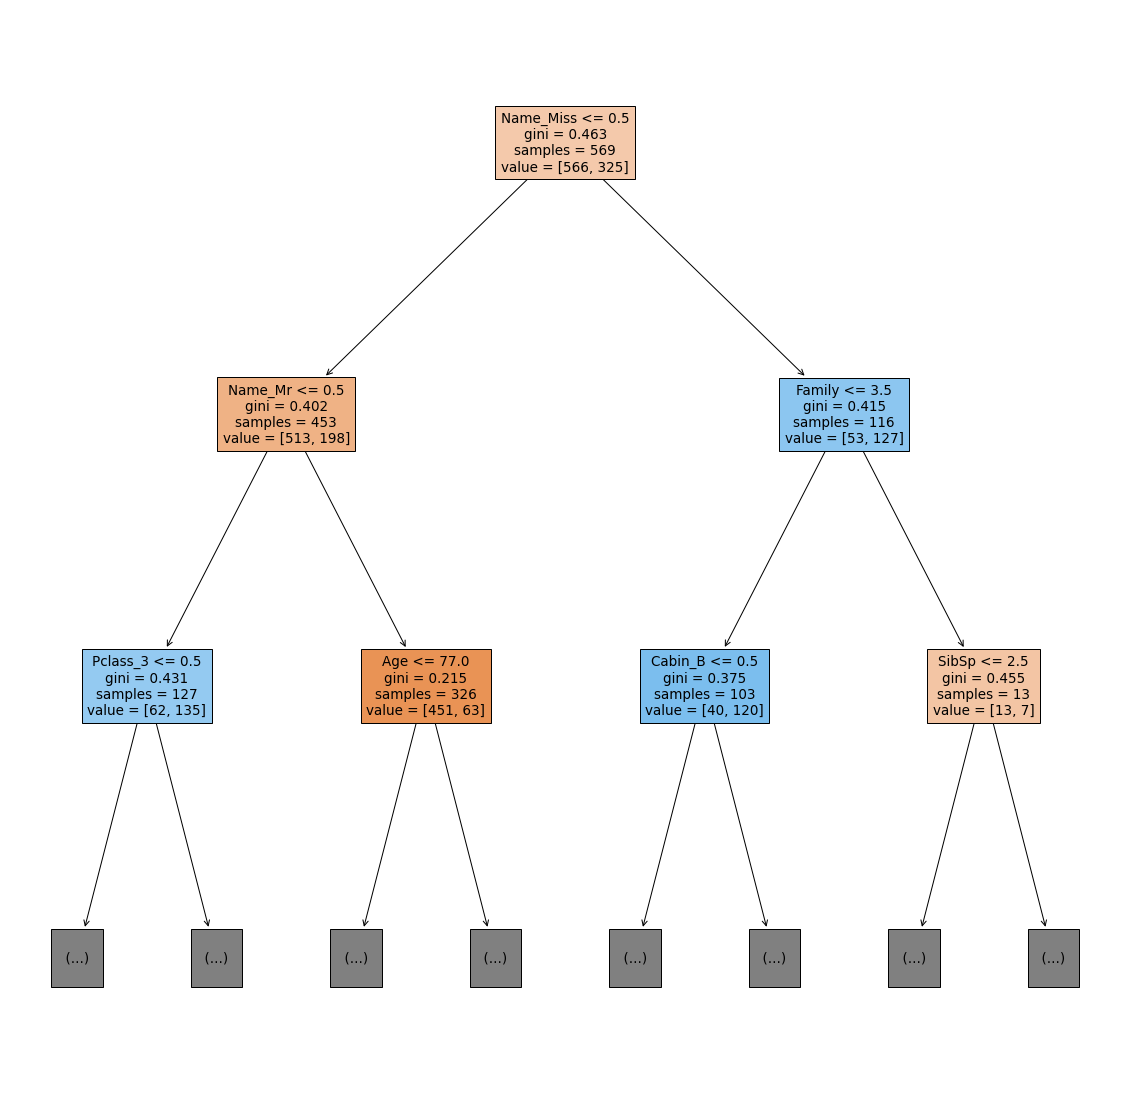

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, max_depth=5, n_jobs=-1)
clf.fit(x, y)
plt.figure(figsize=(20, 20))
# 你可以挑選十顆裡面的某科把它畫出來, 看一下什麼叫做略有不同
plot_tree(clf.estimators_[3], feature_names=datas.columns, filled=True, max_depth=2)

In [41]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=100, max_depth=6)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print(scores)
print(np.average(scores))

[0.82222222 0.86516854 0.75280899 0.87640449 0.87640449 0.82022472
 0.84269663 0.78651685 0.85393258 0.82022472]
0.8316604244694134


In [ ]:
# from sklearn.model_selection import GridSearchCV
# clf = RandomForestClassifier()
# params = {
#     "n_estimators":range(11, 150, 2),
#     "max_depth":[5, 6, 7, 8, 9, 10]
# }
# cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
# cv.fit(x, y)

In [ ]:
cv.best_params_

In [44]:
clf = RandomForestClassifier(n_estimators=51, max_depth=6)
clf.fit(x, y)
pre = clf.predict(x_predict)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("rf.csv", encoding="utf-8", index=False)
df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [45]:
pd.DataFrame({
  "importance":clf.feature_importances_
}, index=datas.columns).sort_values(by="importance", ascending=False)

,importance
Sex_female,0.172743
Sex_male,0.165537
Name_Mr,0.131654
Fare,0.091778
Pclass_3,0.073334
Age,0.054018
Family,0.046261
Ticket,0.045294
Name_Mrs,0.031603
SibSp,0.028904


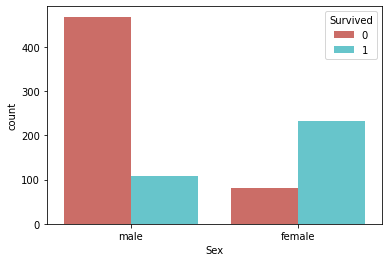

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=train_df["Sex"], hue=train_df["Survived"], palette=sns.color_palette("hls", 2))

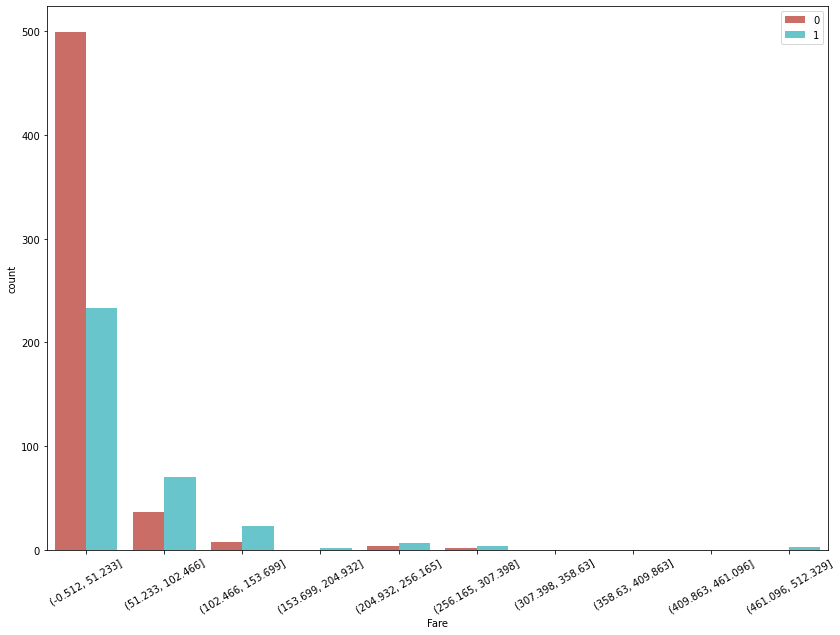

In [33]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Fare"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

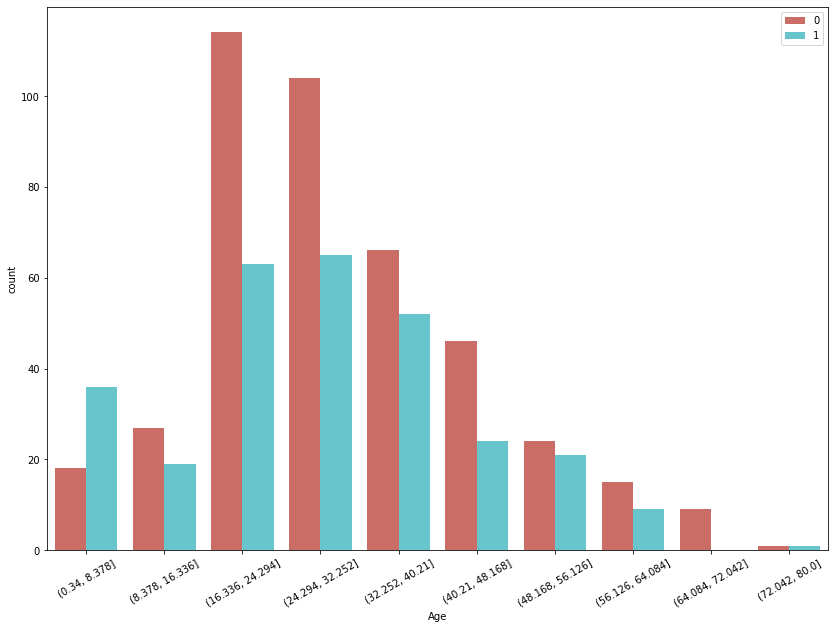

In [34]:
plt.figure(figsize=(14, 10))
fcut = pd.cut(train_df["Age"], 10)
sns.countplot(x=fcut, hue=train_df["Survived"], palette=sns.color_palette("hls", 2))
plt.xticks(rotation=30)
plt.legend(loc="upper right")

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_scale = scaler.fit_transform(datas)
# 已經是np array, 所以不是用.iloc(pandas)
x_scale = datas_scale[:len(train_df)]
x_predict_scale = datas_scale[len(train_df):]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, cv=10, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.832796504369538


In [38]:
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(5, 50)
}
cv = GridSearchCV(clf, params, scoring="f1", cv=10, n_jobs=-1)
cv.fit(x_scale, y)
print(cv.best_params_)
print(cv.best_score_)

{'n_neighbors': 7}
0.761215662591535


In [39]:
# 我手動的調整過
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
df = pd.DataFrame({
    "PassengerId":predict_df["PassengerId"],
    "Survived":pre
})
df.to_csv("knn.csv", encoding="utf-8", index=False)
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
